### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = [10.0, 8.0]

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [17]:
data = pd.read_csv('coupons.csv')

In [18]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [20]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [21]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns, 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
destination,destination,0.000000
passanger,passanger,0.000000
weather,weather,0.000000
temperature,temperature,0.000000
time,time,0.000000
coupon,coupon,0.000000
expiration,expiration,0.000000
gender,gender,0.000000
age,age,0.000000
maritalStatus,maritalStatus,0.000000


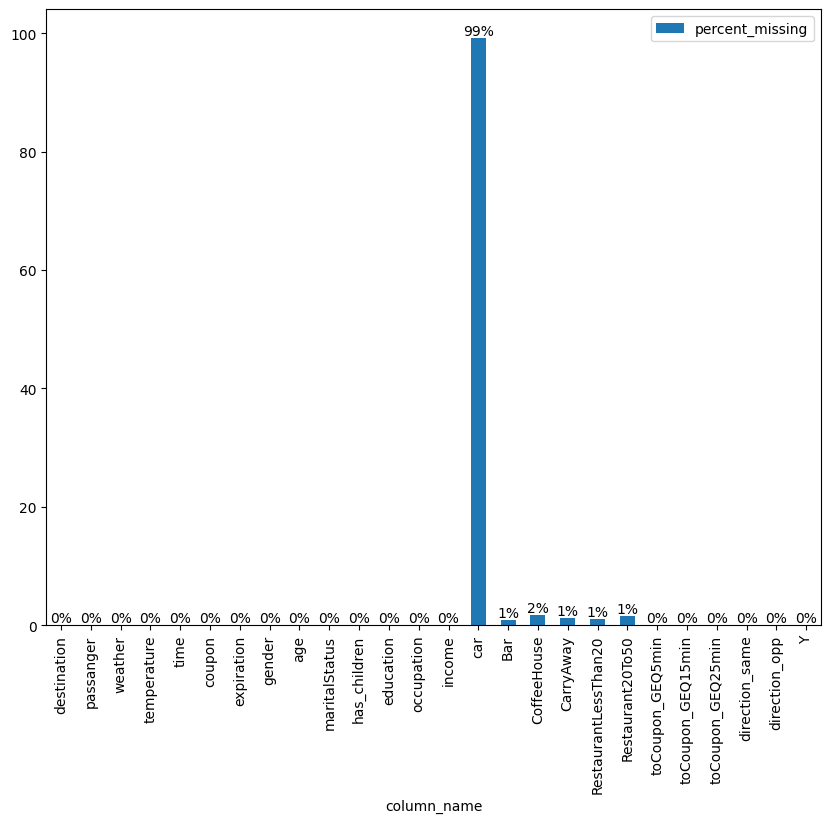

In [22]:
ax = missing_value_df.plot.bar(x='column_name', y='percent_missing', rot=90)
for container in ax.containers:
    ax.bar_label(container,fmt='%.0f%%')

In [23]:
data.age.value_counts()

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

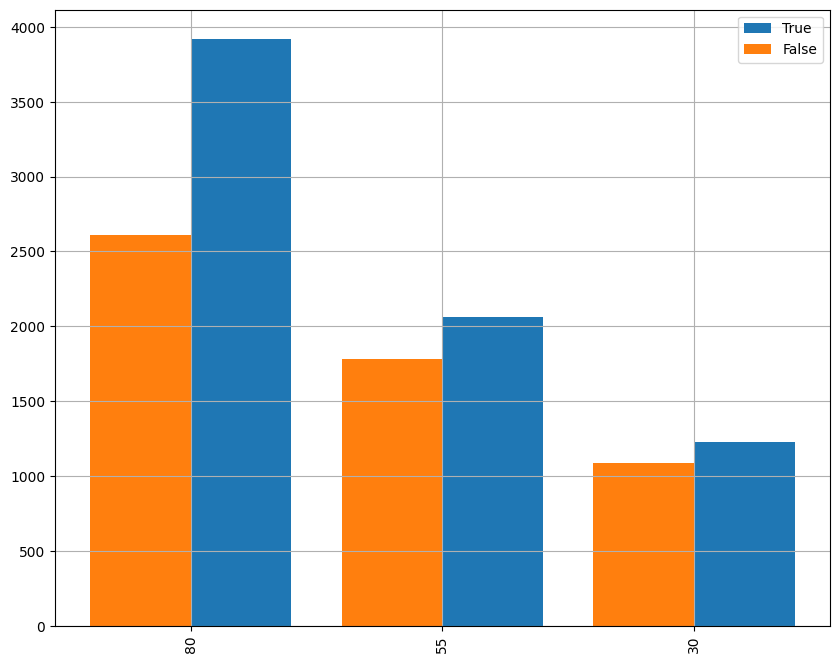

In [24]:
# Distribution Plots for Temperature Variable

var='temperature'
datax=data.loc[data.Y==1, var].value_counts().reset_index()
# datax['Zone']=(datax['Zone']-datax['Zone'].min())/(datax['Zone'].max()-datax['Zone'].min())
datay=data.loc[data.Y==0, var].value_counts().reset_index()
# datay['Zone']=(datay['Zone']-datay['Zone'].min())/(datay['Zone'].max()-datay['Zone'].min())
plt.bar(datax.index+0.2, datax[var], width=0.4, alpha=1, label='True')
plt.bar(datay.index-0.2, datay[var], width=0.4, alpha=1, label='False')
plt.xticks(ticks=range(len(datax.index)), labels=datax['index'].tolist(), rotation=90)
plt.grid()
plt.legend()

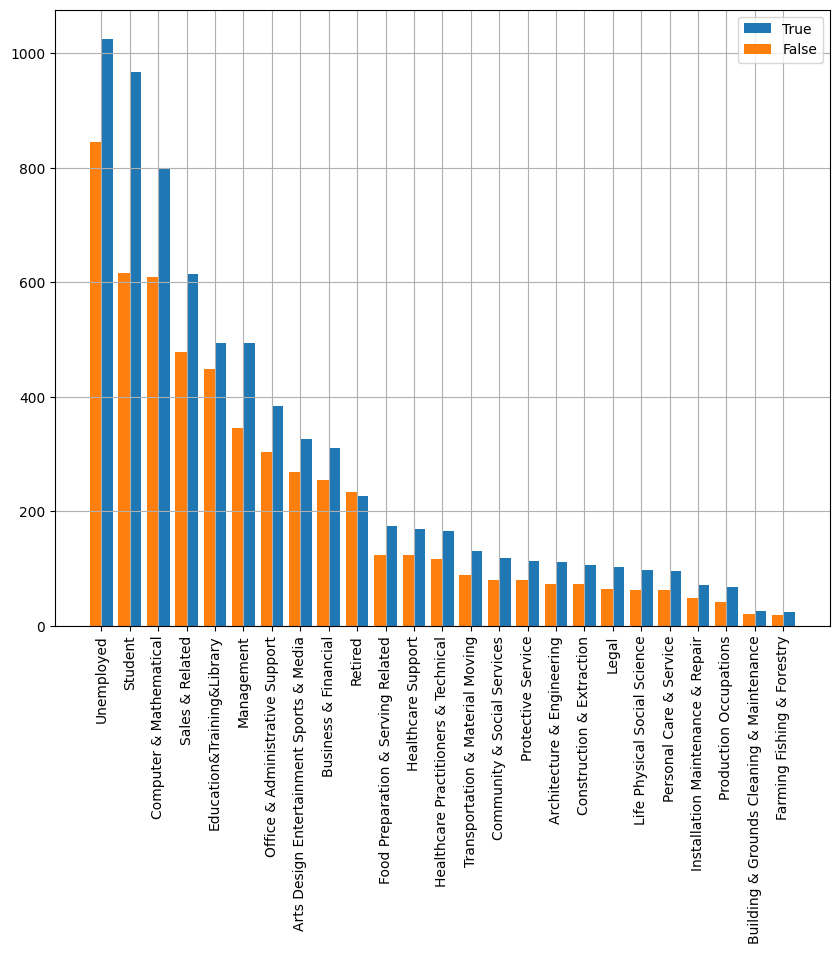

In [25]:
# Distribution Plots for occupation Variable

var='occupation'
datax=data.loc[data.Y==1, var].value_counts().reset_index()
# datax['Zone']=(datax['Zone']-datax['Zone'].min())/(datax['Zone'].max()-datax['Zone'].min())
datay=data.loc[data.Y==0, var].value_counts().reset_index()
# datay['Zone']=(datay['Zone']-datay['Zone'].min())/(datay['Zone'].max()-datay['Zone'].min())
plt.bar(datax.index+0.2, datax[var], width=0.4, alpha=1, label='True')
plt.bar(datay.index-0.2, datay[var], width=0.4, alpha=1, label='False')
plt.xticks(ticks=range(len(datax.index)), labels=datax['index'].tolist(), rotation=90)
plt.grid()
plt.legend()

3. Decide what to do about your missing data -- drop, replace, other...

In [26]:
# Not enough data points for 'car' (99% missing values), single value in 'toCoupon_GEQ5min' column
# 'direction_opp' is just the complementary column of 'direction_same'

drop_cols=['car','toCoupon_GEQ5min', 'direction_opp']

In [27]:
data = data.drop(drop_cols, axis=1)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [29]:
impute_cols=['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']

In [30]:
# Imputation of mode
for col in impute_cols:
    fill_val=data[col].mode()[0]
    data[col]=data[col].fillna(fill_val)

4. What proportion of the total observations chose to accept the coupon?



In [31]:
data.Y.sum()/data.shape[0]

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

In [32]:
data.coupon.value_counts()

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

<Axes: xlabel='coupon', ylabel='Count'>

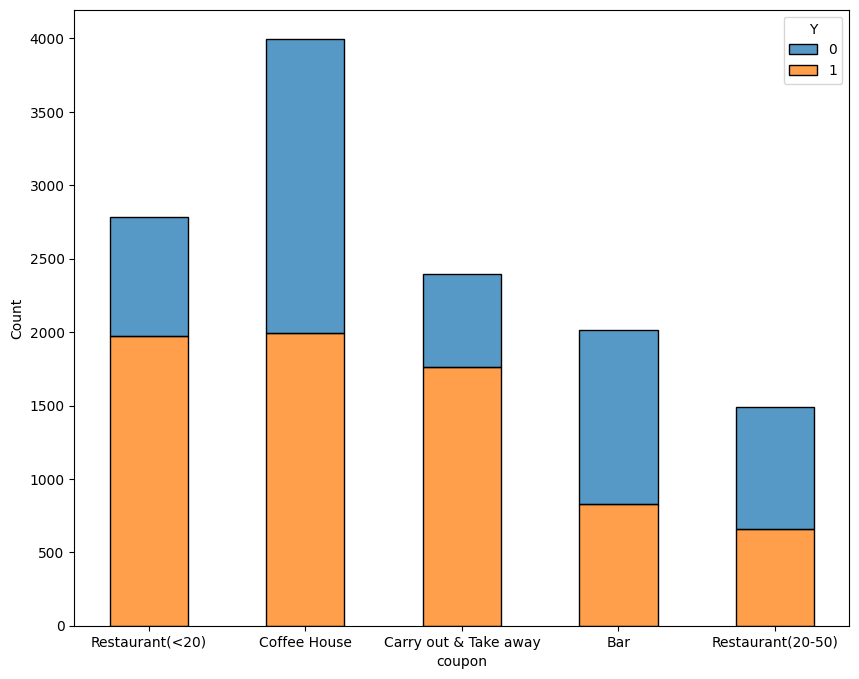

In [33]:
sns.histplot(data, x='coupon', hue='Y', multiple='stack', shrink=0.5)

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

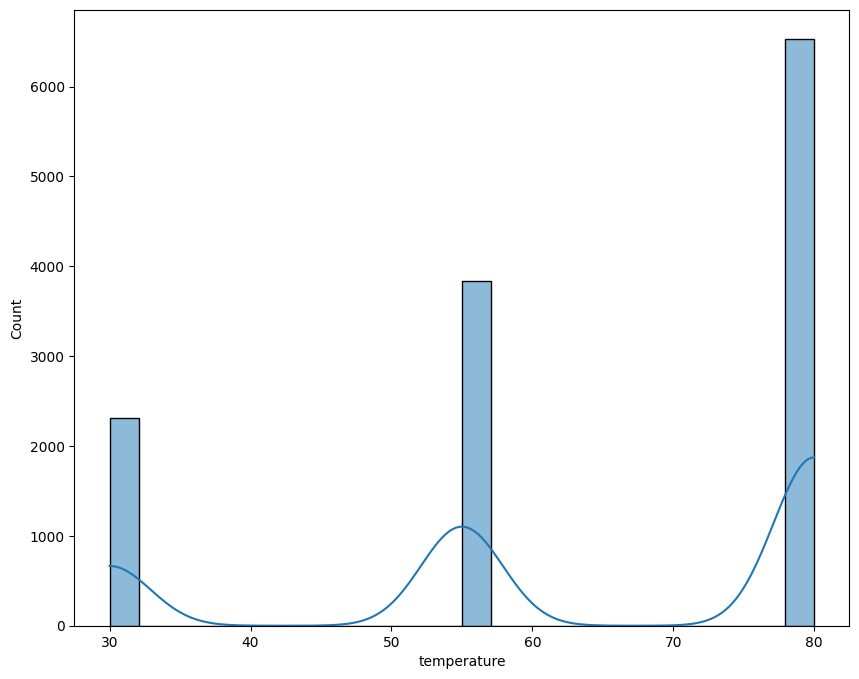

In [34]:
sns.histplot(data,x=data["temperature"], kde = True)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [35]:
df_bar_coupons=data[data.coupon=='Bar']
df_bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,1,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,1,0,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,0,0,0,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,0,0,1,1


2. What proportion of bar coupons were accepted?


In [36]:
accepted_bar_coupons_proportion = df_bar_coupons.Y.sum()/df_bar_coupons.shape[0]
accepted_bar_coupons_proportion

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [37]:
bar_cust_1 = df_bar_coupons[df_bar_coupons["Bar"].isin(["never", "less1", "1~3"])]
bar_cust_1_ac_rate = bar_cust_1.Y.sum() / bar_cust_1.Y.shape[0] * 100
bar_cust_2 = df_bar_coupons[~df_bar_coupons["Bar"].isin(["never", "less1", "1~3"])]
bar_cust_2_ac_rate = bar_cust_2.Y.sum() / bar_cust_2.Y.shape[0] * 100
print (bar_cust_1_ac_rate,bar_cust_2_ac_rate)

37.073707370737075 76.88442211055276


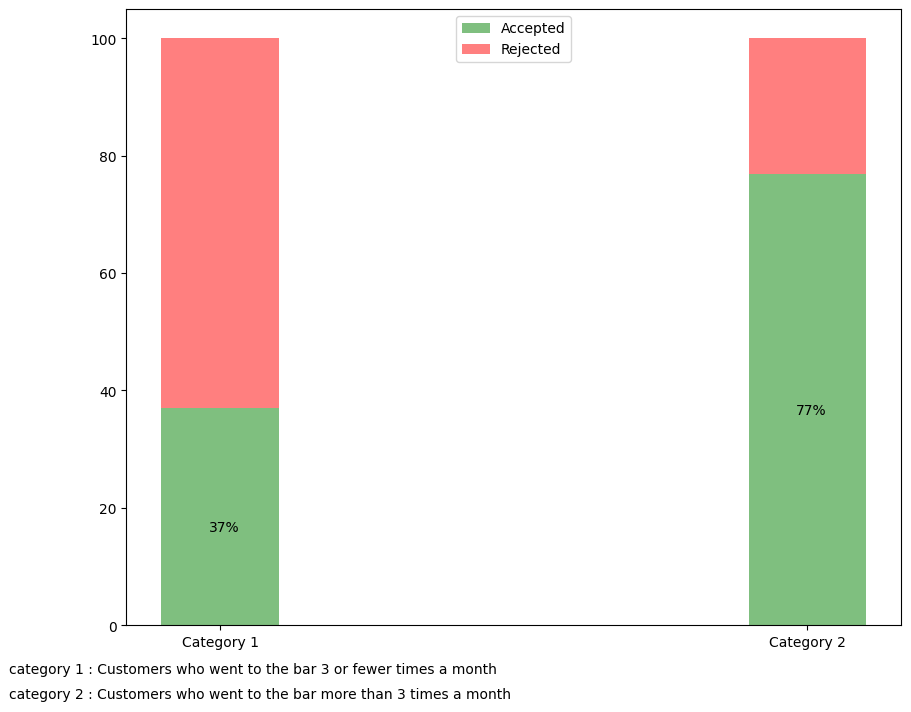

In [38]:
x = ['Category 1', 'Category 2']
y1 = [bar_cust_1_ac_rate, bar_cust_2_ac_rate]
y2 = [100-bar_cust_1_ac_rate, 100 - bar_cust_2_ac_rate]

# plot bars in stack manner
p1 = plt.bar(x, y1, color='g' , alpha = 0.5, width =0.2, linewidth=1)
p2 = plt.bar(x, y2, bottom=y1, color='r',alpha = 0.5, width =0.2, linewidth=1)

plt.legend((p1[0], p2[0]), ("Accepted",'Rejected'),loc = "upper center")
plt.text(-0.15, -0.08, 'category 1 : Customers who went to the bar 3 or fewer times a month', transform=ax.transAxes, fontsize=10)
plt.text(-0.15, -0.12, 'category 2 : Customers who went to the bar more than 3 times a month', transform=ax.transAxes, fontsize=10)

plt.text(0.98,36, "{0:.0%}".format(bar_cust_2_ac_rate/100))
plt.text(-0.02,16, "{0:.0%}".format(bar_cust_1_ac_rate/100))

plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [39]:
bar_and_age_cust_1 = df_bar_coupons[df_bar_coupons["Bar"].isin(["1~3","4~8","gt8"]) & ~df_bar_coupons["age"].isin(["21","below21"])]
bar_and_age_cust_1_ac_rate = bar_and_age_cust_1.Y.sum() / bar_and_age_cust_1.Y.shape[0] * 100
bar_and_age_cust_2 = df_bar_coupons[~(df_bar_coupons["Bar"].isin(["1~3","4~8","gt8"]) & ~df_bar_coupons["age"].isin(["21","below21"]))]
bar_and_age_cust_2_ac_rate = bar_and_age_cust_2.Y.sum() / bar_and_age_cust_2.Y.shape[0] * 100
print (bar_and_age_cust_1_ac_rate,bar_and_age_cust_2_ac_rate)

69.52380952380952 33.500313087038194


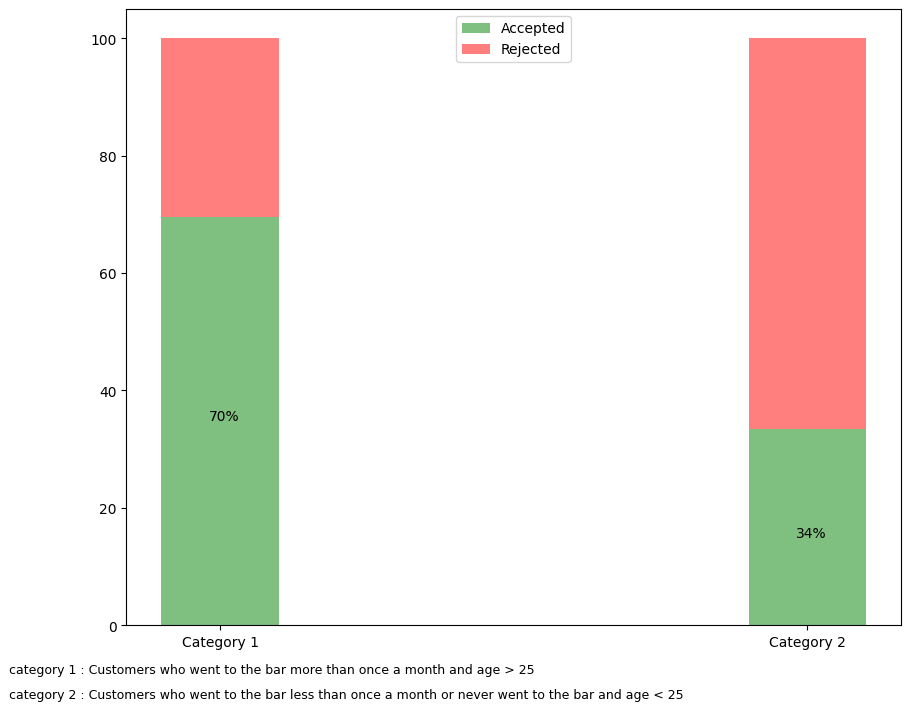

In [40]:
x = ['Category 1', 'Category 2']
y1 = [bar_and_age_cust_1_ac_rate, bar_and_age_cust_2_ac_rate]
y2 = [100-bar_and_age_cust_1_ac_rate, 100 - bar_and_age_cust_2_ac_rate]

# plot bars in stack manner
p1 = plt.bar(x, y1, color='g' , alpha = 0.5, width =0.2, linewidth=1)
p2 = plt.bar(x, y2, bottom=y1, color='r',alpha = 0.5, width =0.2, linewidth=1)

plt.legend((p1[0], p2[0]), ("Accepted",'Rejected'),loc = "upper center")
plt.text(-0.15, -0.08, 'category 1 : Customers who went to the bar more than once a month and age > 25', transform=ax.transAxes, fontsize=9)
plt.text(-0.15, -0.12, 'category 2 : Customers who went to the bar less than once a month or never went to the bar and age < 25', transform=ax.transAxes, fontsize=9)

plt.text(0.98,15, "{0:.0%}".format(bar_and_age_cust_2_ac_rate/100))
plt.text(-0.02,35, "{0:.0%}".format(bar_and_age_cust_1_ac_rate/100))
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [41]:
cust1 = df_bar_coupons[df_bar_coupons["Bar"].isin(["1~3","4~8","gt8"]) & ~df_bar_coupons["passanger"].isin(["Kid(s)"]) & ~df_bar_coupons["occupation"].isin(['Farming Fishing & Forestry'])]
cust1_ac_rate = cust1.Y.sum() / cust1.Y.shape[0] * 100
print (cust1_ac_rate)

cust2 = df_bar_coupons[~(df_bar_coupons["Bar"].isin(["1~3","4~8","gt8"]) & ~df_bar_coupons["passanger"].isin(["Kid(s)"]) & ~df_bar_coupons["occupation"].isin(['Farming Fishing & Forestry']))]
cust2_ac_rate = cust2.Y.sum() / cust2.Y.shape[0] * 100
print (cust2_ac_rate)

71.32486388384754
29.6043656207367


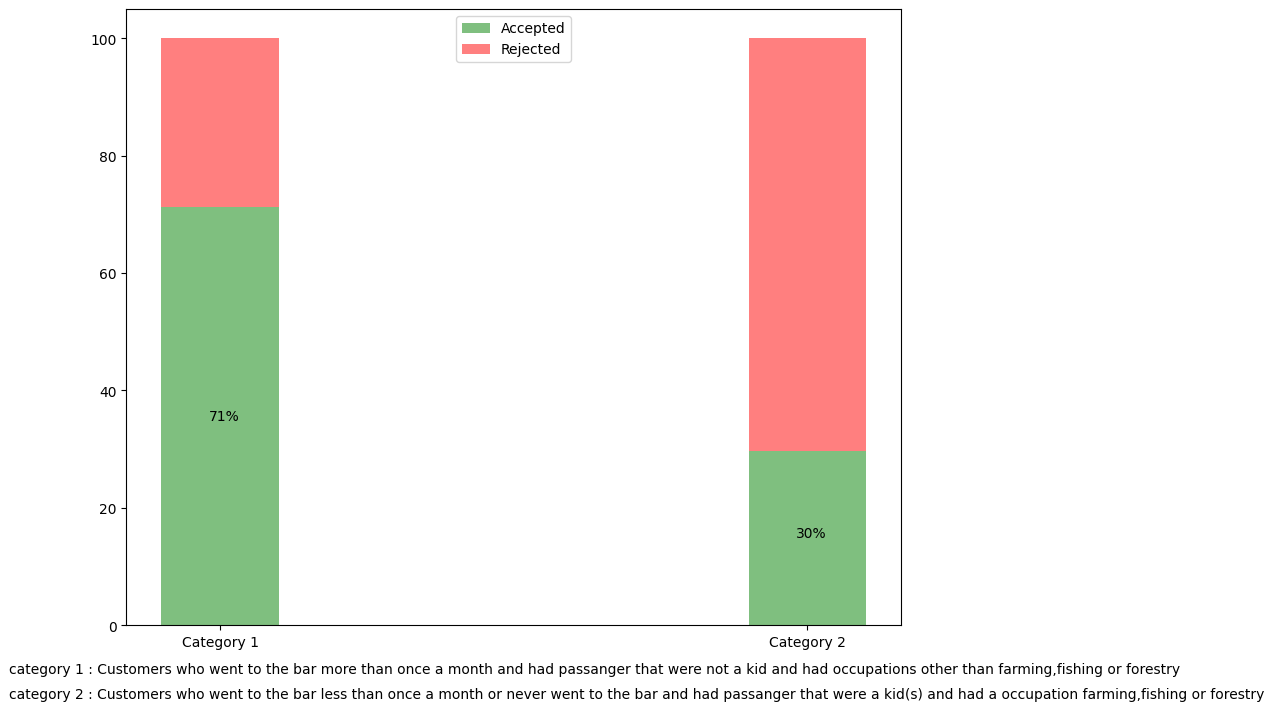

In [42]:
x = ['Category 1', 'Category 2']
y1 = [cust1_ac_rate, cust2_ac_rate]
y2 = [100-cust1_ac_rate, 100 - cust2_ac_rate]

# plot bars in stack manner
p1 = plt.bar(x, y1, color='g' , alpha = 0.5, width =0.2, linewidth=1)
p2 = plt.bar(x, y2, bottom=y1, color='r',alpha = 0.5, width =0.2, linewidth=1)

plt.legend((p1[0], p2[0]), ("Accepted",'Rejected'),loc = "upper center")
plt.text(-0.15, -0.08, 'category 1 : Customers who went to the bar more than once a month and had passanger that were not a kid and had occupations other than farming,fishing or forestry', transform=ax.transAxes, fontsize=10)
plt.text(-0.15, -0.12, 'category 2 : Customers who went to the bar less than once a month or never went to the bar and had passanger that were a kid(s) and had a occupation farming,fishing or forestry', transform=ax.transAxes, fontsize=10)

plt.text(0.98,15, "{0:.0%}".format(cust2_ac_rate/100))
plt.text(-0.02,35, "{0:.0%}".format(cust1_ac_rate/100))
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [43]:
cust1 = df_bar_coupons[(df_bar_coupons["Bar"].isin(["1~3","4~8","gt8"]) & ~df_bar_coupons["passanger"].isin(["Kid(s)"]) & ~df_bar_coupons["maritalStatus"].isin(['Widowed'])) | (df_bar_coupons["Bar"].isin(["1~3","4~8","gt8"]) & ~df_bar_coupons["age"].isin(["21","below21","26"])) | (df_bar_coupons["RestaurantLessThan20"].isin(["4~8","gt8"]) & df_bar_coupons["income"].isin(["$25000 - $37499","$12500 - $24999","$37500 - $49999","Less than $12500"]))]
cust1_ac_rate = cust1.Y.sum() / cust1.Y.shape[0] * 100
print (cust1_ac_rate)

cust2 = df_bar_coupons[~((df_bar_coupons["Bar"].isin(["1~3","4~8","gt8"]) & ~df_bar_coupons["passanger"].isin(["Kid(s)"]) & ~df_bar_coupons["maritalStatus"].isin(['Widowed'])) | (df_bar_coupons["Bar"].isin(["1~3","4~8","gt8"]) & ~df_bar_coupons["age"].isin(["21","below21","26"])) | (df_bar_coupons["RestaurantLessThan20"].isin(["4~8","gt8"]) & df_bar_coupons["income"].isin(["$25000 - $37499","$12500 - $24999","$37500 - $49999","Less than $12500"])))]
cust2_ac_rate = cust2.Y.sum() / cust2.Y.shape[0] * 100
print (cust2_ac_rate)


57.44416873449132
30.057803468208093


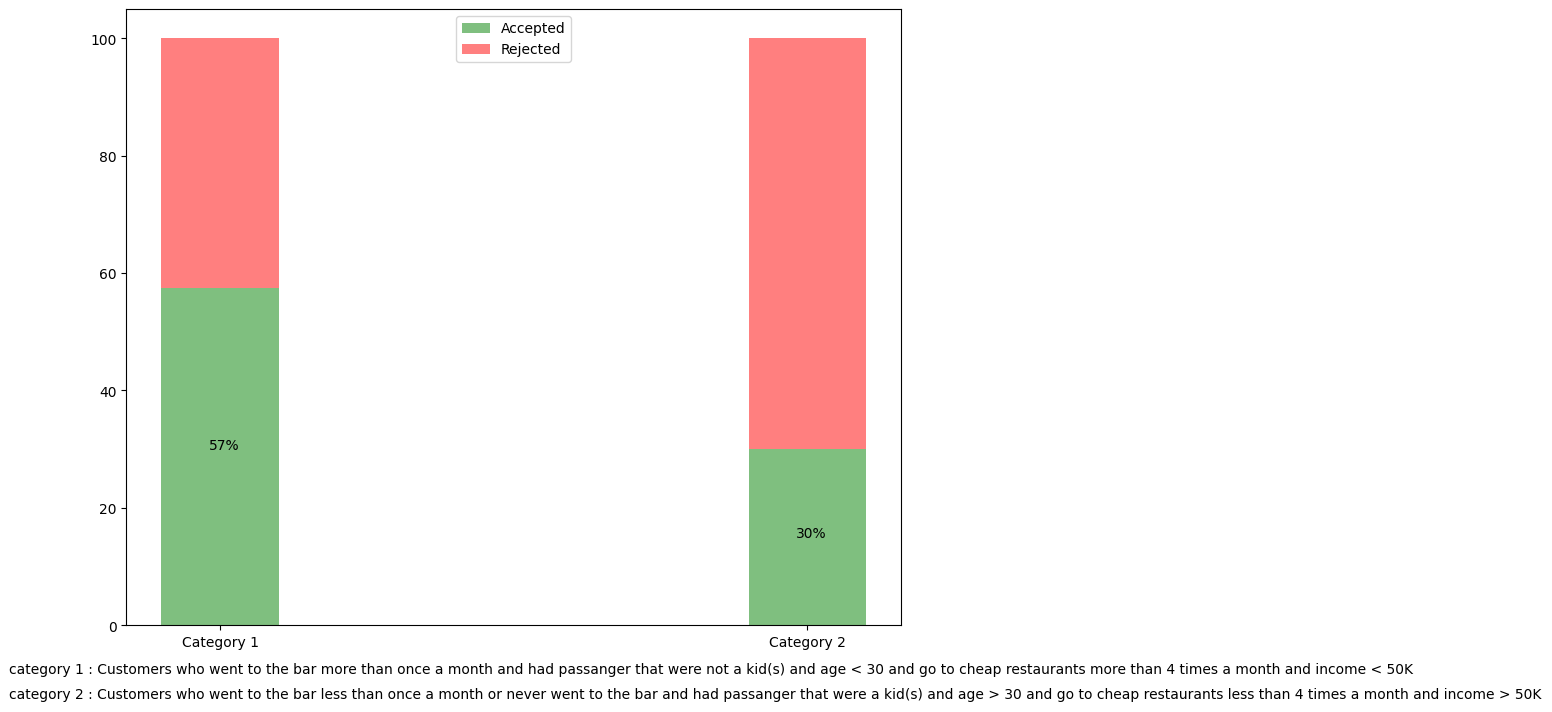

In [44]:
x = ['Category 1', 'Category 2']
y1 = [cust1_ac_rate, cust2_ac_rate]
y2 = [100-cust1_ac_rate, 100 - cust2_ac_rate]

# plot bars in stack manner
p1 = plt.bar(x, y1, color='g' , alpha = 0.5, width =0.2, linewidth=1)
p2 = plt.bar(x, y2, bottom=y1, color='r',alpha = 0.5, width =0.2, linewidth=1)

plt.legend((p1[0], p2[0]), ("Accepted",'Rejected'),loc = "upper center")
plt.text(-0.15, -0.08, 'category 1 : Customers who went to the bar more than once a month and had passanger that were not a kid(s) and age < 30 and go to cheap restaurants more than 4 times a month and income < 50K', transform=ax.transAxes, fontsize=10)
plt.text(-0.15, -0.12, 'category 2 : Customers who went to the bar less than once a month or never went to the bar and had passanger that were a kid(s) and age > 30 and go to cheap restaurants less than 4 times a month and income > 50K', transform=ax.transAxes, fontsize=10)

plt.text(0.98,15, "{0:.0%}".format(cust2_ac_rate/100))
plt.text(-0.02,30, "{0:.0%}".format(cust1_ac_rate/100))
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Typically, the drivers who accepted the coupons had the below characteristics :

Those who went to the bar more than 3 times a month.
Interestingly, there was another category where the bar coupon acceptance was higher, which was for those who were over the age of 25 AND who had passengers that were not a kid AND had occupation other than farming, fishing, or forestry. bold text

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [45]:
df_CoffeeHouse_coupons=data[data.coupon=='Coffee House']
df_CoffeeHouse_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,1,0,0,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,1~3,4~8,1~3,0,0,0,0


In [46]:
CoffeeHouse_cust_1 = df_CoffeeHouse_coupons[df_CoffeeHouse_coupons["CoffeeHouse"].isin(["1~3","4~8","gt8"]) & df_CoffeeHouse_coupons["occupation"].isin(["Student"]) & df_CoffeeHouse_coupons["passanger"].isin(["Friend(s)"])]
CoffeeHouse_cust_1_ac_rate = CoffeeHouse_cust_1.Y.sum() / CoffeeHouse_cust_1.Y.shape[0] * 100
CoffeeHouse_cust_2 = df_CoffeeHouse_coupons[~(df_CoffeeHouse_coupons["CoffeeHouse"].isin(["1~3","4~8","gt8"]) & df_CoffeeHouse_coupons["occupation"].isin(["Student"]) & df_CoffeeHouse_coupons["passanger"].isin(["Friend(s)"]))]
CoffeeHouse_cust_2_ac_rate = CoffeeHouse_cust_2.Y.sum() / CoffeeHouse_cust_2.Y.shape[0] * 100

In [47]:
CoffeeHouse_cust_1_ac_rate

81.73076923076923

In [48]:
CoffeeHouse_cust_2_ac_rate

49.07502569373073

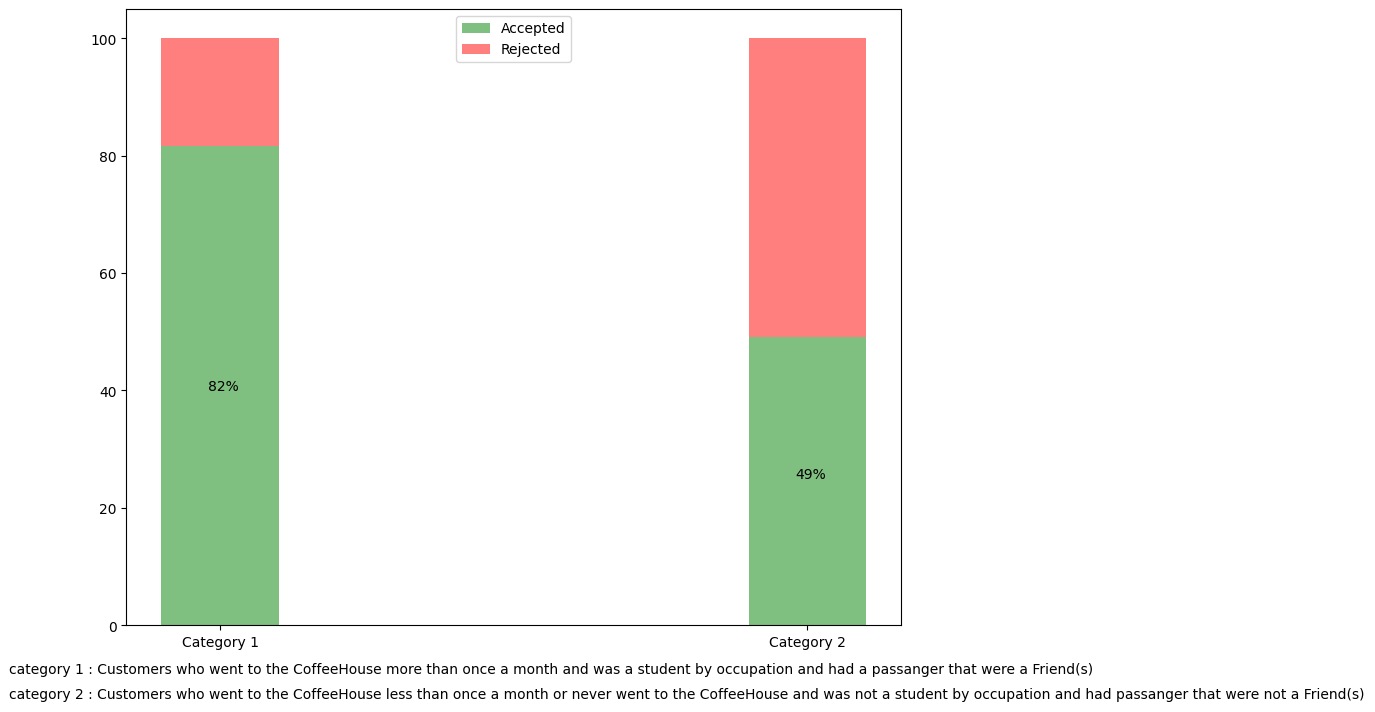

In [49]:
x = ['Category 1', 'Category 2']
y1 = [CoffeeHouse_cust_1_ac_rate, CoffeeHouse_cust_2_ac_rate]
y2 = [100-CoffeeHouse_cust_1_ac_rate, 100 - CoffeeHouse_cust_2_ac_rate]

# plot bars in stack manner
p1 = plt.bar(x, y1, color='g' , alpha = 0.5, width =0.2, linewidth=1)
p2 = plt.bar(x, y2, bottom=y1, color='r',alpha = 0.5, width =0.2, linewidth=1)

plt.legend((p1[0], p2[0]), ("Accepted",'Rejected'),loc = "upper center")
plt.text(-0.15, -0.08, 'category 1 : Customers who went to the CoffeeHouse more than once a month and was a student by occupation and had a passanger that were a Friend(s)', transform=ax.transAxes, fontsize=10)
plt.text(-0.15, -0.12, 'category 2 : Customers who went to the CoffeeHouse less than once a month or never went to the CoffeeHouse and was not a student by occupation and had passanger that were not a Friend(s)', transform=ax.transAxes, fontsize=10)

plt.text(0.98,25, "{0:.0%}".format(CoffeeHouse_cust_2_ac_rate/100))
plt.text(-0.02,40, "{0:.0%}".format(CoffeeHouse_cust_1_ac_rate/100))
plt.show()

Typically, the drivers who accepted the coupons (filtering the coffeeHouse coupon) had the below characteristics :

Those who go to the CoffeeHouse more than once a month AND who was a student by occupation AND who had a passanger friend along with him.